In [1]:
import pandas as pd
import pylab as plt
import seaborn as sns
import numpy as np

Importing the necessary libraries

In [2]:
data=pd.read_csv('../../data/second/onlinefraud.csv')

Opening the file with the dataset

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

## Columns and their descriptions:

**step**: Represents a unit of time where 1 step equals 1 hour

**type**:Type of online transaction

**amount**: The amount of the transaction

**nameOrig**: Customer starting the transaction

**oldbalanceOrg**: Balance before the transaction

**newbalanceOrig**: Balance after the transaction

**nameDest**: Recipient of the transaction

**oldbalanceDest**: Initial balance of recipient before the transaction

**newbalanceDest**: The new balance of recipient after the transaction

**isFraud**: Is it a fraud transaction? (0 for no 1 for yes)

**isFlaggedFraud**: Was the transaction flagged as fraud? (0 for no 1 for yes)


In [5]:
data.shape #checking the shape of the dataframe

(6362620, 11)

In [6]:
data.info()   # seeing the types of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
data.duplicated().any()  #no duplicated rows

False

In [8]:
data.isnull().sum() #no null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


C:\Users\akoun\AppData\Local\Temp\ipykernel_15488\2117017749.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(data.corr(), dtype=bool))
C:\Users\akoun\AppData\Local\Temp\ipykernel_15488\2117017749.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


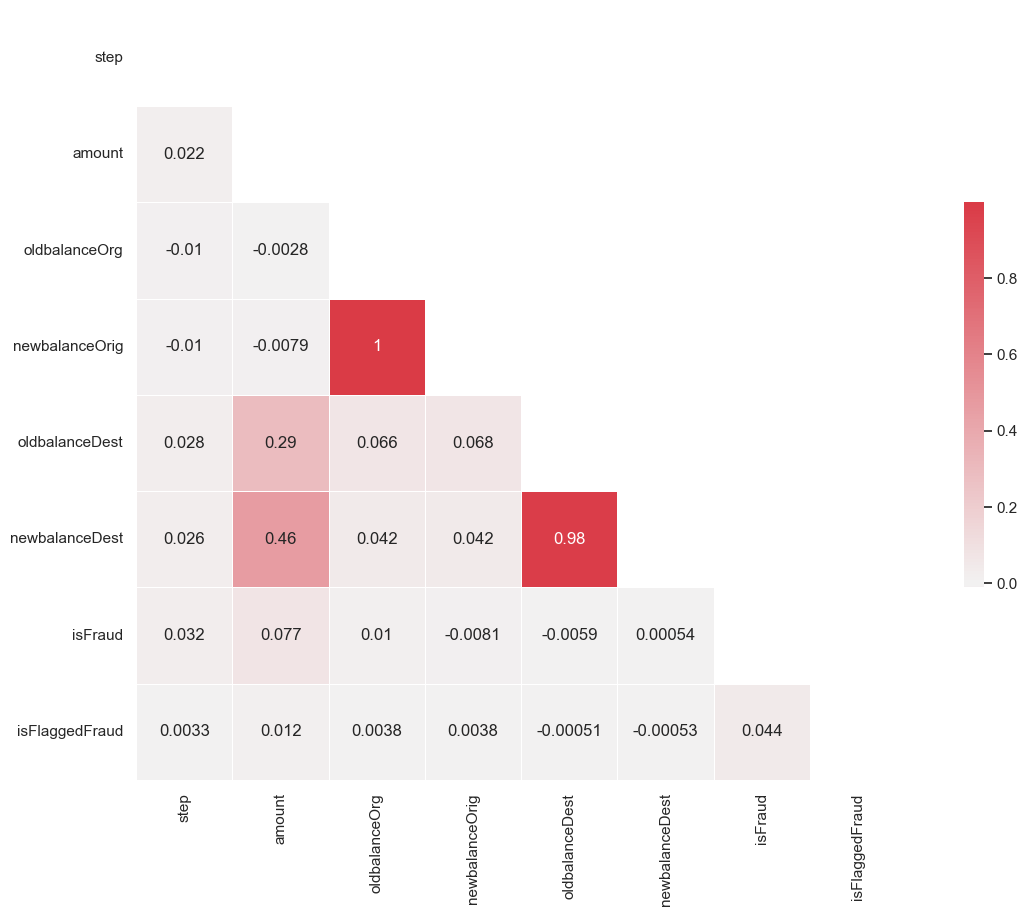

In [10]:
#Checking the correlations 

plt.figure(figsize=(15, 10))  

sns.set(style='white')    

mask=np.triu(np.ones_like(data.corr(), dtype=bool))    

cmap=sns.diverging_palette(0, 10, as_cmap=True)   


sns.heatmap(data.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

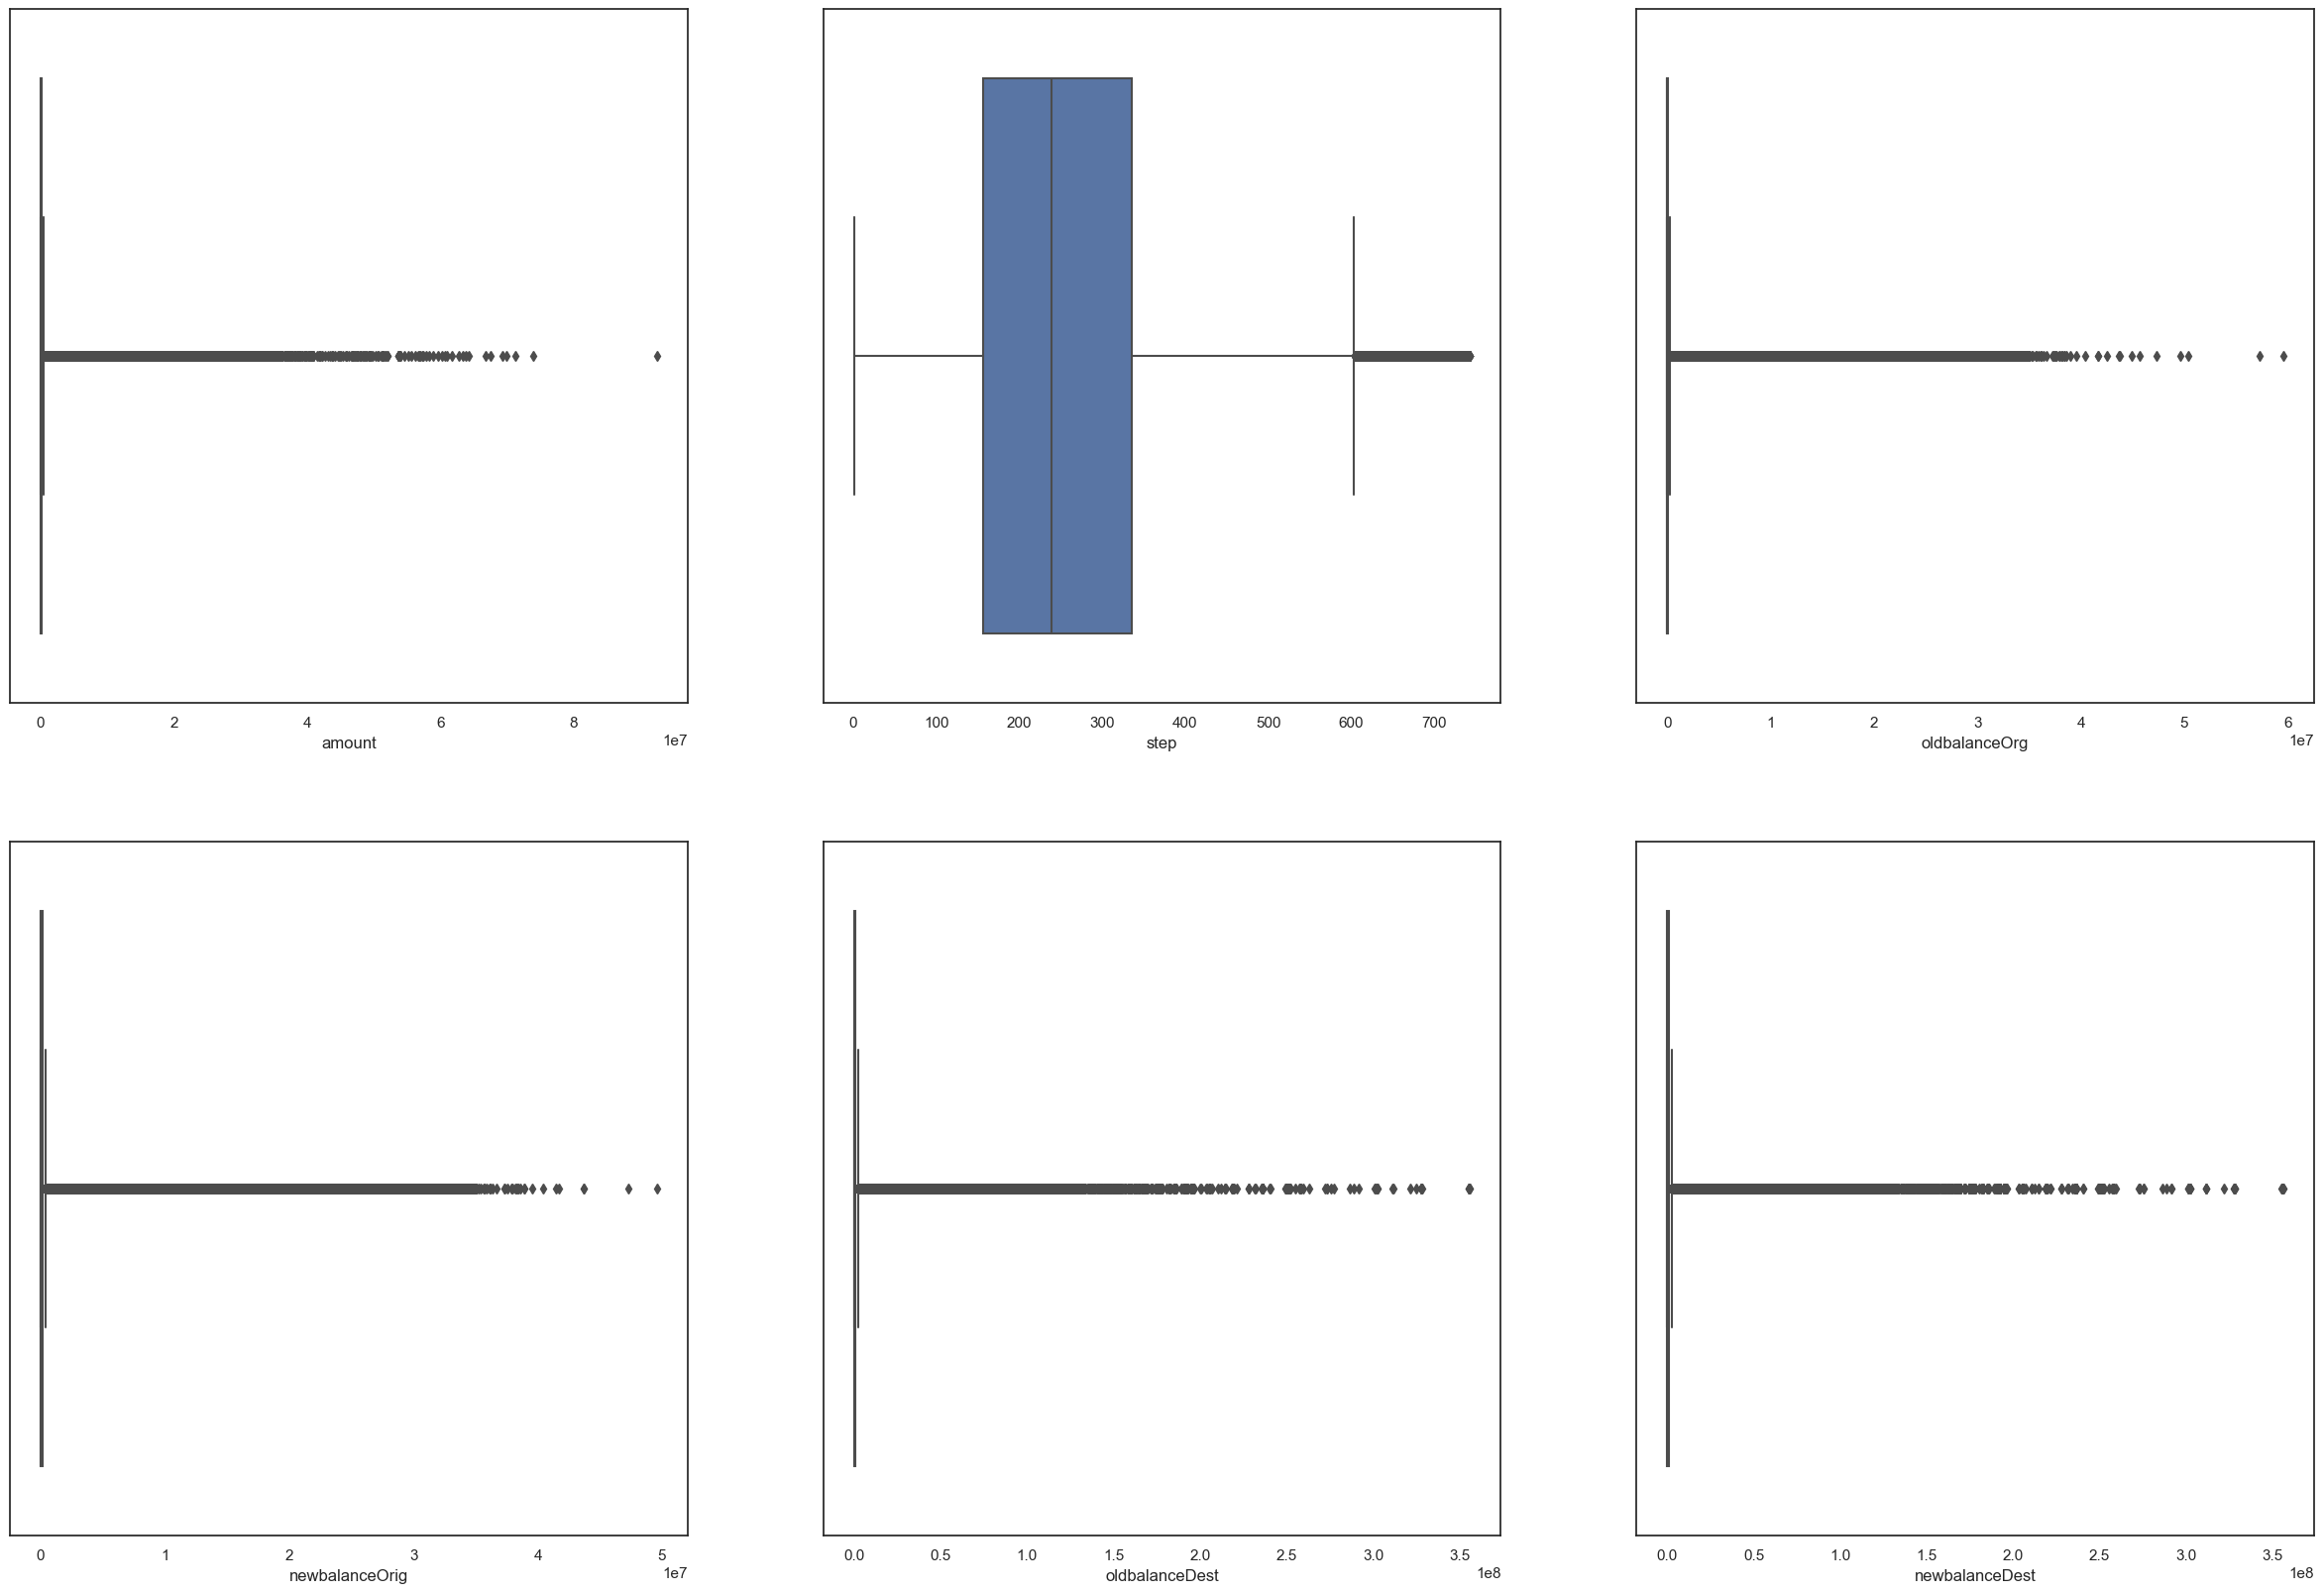

In [11]:
#checking the outliers
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
df = data[['amount', 'step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

ax = ax.flatten()

for i in range(len(df.columns)):
    sns.boxplot(x=df.columns[i], data=df, ax=ax[i])

plt.show()

Above are the boxplots for the outliers for the numerical non-binary columns. There are quite a few of them.

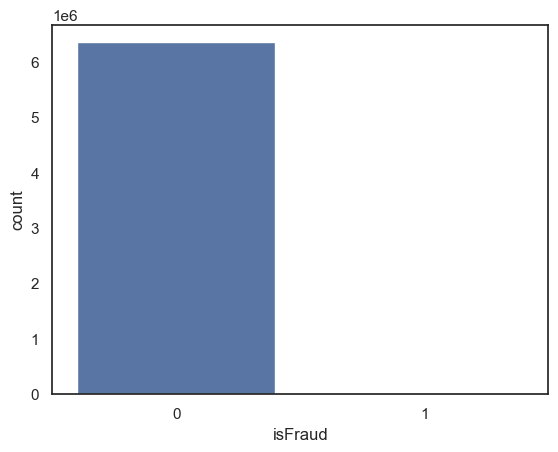

In [12]:
sns.countplot(x ='isFraud', data = data)
 
plt.show()

In [13]:
data['isFraud'].value_counts()   ,          data['isFraud'].value_counts() / data.shape[0] * 100

(0    6354407
 1       8213
 Name: isFraud, dtype: int64,
 0    99.870918
 1     0.129082
 Name: isFraud, dtype: float64)

As we can see above there are far more non-fraud rows than there are fraud rows in the dataset. 

#Seeing the distributions of the numeric columns
x_amount = (0, 10000000)  
x_oldbalanceOrg = (0, 20000000)  
x_newbalanceOrig= (0, 20000000)  
x_oldbalanceDest= (0, 2000000)  
x_newbalanceDest= (0, 2000000)  

num_bins = 100

# amount plot
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data,
    x='amount',
    kde=True,
    color='cyan',
    line_kws={"linewidth": 2},
    alpha=0.2,
)
plt.title('Histogram for amount', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(x_amount)
plt.show()

# plot for oldbalanceOrg
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data,
    x='oldbalanceOrg',
    kde=True,
    color='magenta',
    line_kws={"linewidth": 2},
    alpha=0.2,
)
plt.title('Histogram for oldbalanceOrg', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(x_oldbalanceOrg)
plt.show()

# plot for newbalanceOrig
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data,
    x='newbalanceOrig',
    kde=True,
    color='orange',
    line_kws={"linewidth": 2},
    alpha=0.2,
)
plt.title('Histogram for newbalanceOrig', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(x_newbalanceOrig)
plt.show()

# plot for oldbalanceDest
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data,
    x='oldbalanceDest',
    kde=True,
    color='orange',
    line_kws={"linewidth": 2},
    alpha=0.2,
)
plt.title('Histogram for oldbalanceDest', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(x_oldbalanceDest)
plt.show()
          
          
# plot for newbalanceDest
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data,
    x='newbalanceDest',
    kde=True,
    color='orange',
    line_kws={"linewidth": 2},
    alpha=0.2,
)
plt.title('Histogram for newbalanceDest', fontsize=15, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xlim(x_newbalanceDest)
plt.show()

